In [50]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time

In [51]:
# CPU Calculation
def withoutCuda(n):
  t0 = time.time()
  A_CPU = np.random.random([n, n])
  B_CPU = np.random.random([n])
  X_CPU = np.linalg.solve(A_CPU, B_CPU)
  T = time.time() - t0
  print(f'(CPU) If n = {n}, time = {T} sec.')
  return withCuda(n, A_CPU, B_CPU)

In [52]:
# GPU Calculation
def withCuda(n, A_CPU, B_CPU):
  t0 = time.time()
  A_GPU = torch.from_numpy(A_CPU).cuda()
  B_GPU = torch.unsqueeze(torch.from_numpy(B_CPU), 1).cuda()
  X_GPU = torch.solve(B_GPU, A_GPU)
  T = time.time() - t0
  print(f'(GPU) If n = {n}, time = {T} sec.')
  return T

In [53]:
# Get the GPU name
torch.cuda.get_device_name(0)

'Tesla K80'

In [54]:
Ns = [2000, 5000, 10000] # List of values to check
MAX_N = None
MAX_N_TIME = None

GPU_values = list()

In [55]:
for n in Ns:
  temp = withoutCuda(n)
  GPU_values.append(temp)
  if MAX_N_TIME == None or MAX_N_TIME > temp:
    MAX_N = n
    MAX_N_TIME = temp
  print()
print(f'The largest GPU increment at n = {MAX_N} and time = {MAX_N_TIME} sec.')

(CPU) If n = 2000, time = 0.28755879402160645 sec.
(GPU) If n = 2000, time = 0.061037540435791016 sec.

(CPU) If n = 5000, time = 3.0719761848449707 sec.
(GPU) If n = 5000, time = 0.30811619758605957 sec.

(CPU) If n = 10000, time = 21.390188455581665 sec.
(GPU) If n = 10000, time = 1.558668613433838 sec.

The largest GPU increment at n = 2000 and time = 0.061037540435791016 sec.


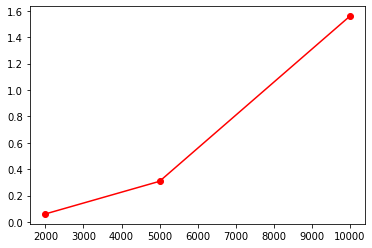

In [56]:
%matplotlib inline
plt.plot(Ns, GPU_values, color='r', marker='o')
plt.show()